In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
designs = np.array(pd.read_csv("/home/udas/Codes/preferece_pureexp/snw.csv", delimiter=';'))  
mu = designs[:,3:]
mu[:,0] = -mu[:,0]
W_90 = np.eye(3)
print(mu.shape)

(205, 2)


In [3]:
theta_45 = np.pi/4
W_45_1 = np.array([-np.tan(np.pi/4-theta_45/2), 1])
W_45_2 = np.array([+np.tan(np.pi/4+theta_45/2), -1])
W_45_1 = W_45_1/np.linalg.norm(W_45_1)
W_45_2 = W_45_2/np.linalg.norm(W_45_2)
W_45 = np.vstack((W_45_1, W_45_2))
print(W_45)

[[-0.38268343  0.92387953]
 [ 0.92387953 -0.38268343]]


In [4]:
pareto_idx_90 = [
                2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  14,  28,  29, 30, 32, 38, 40,  42,
                43,  45,  63, 160, 161, 167, 168, 174
            ]

#pareto_idx_90 = list(np.array(pareto_idx_90) + 1)

pareto_idx_120 = [
                2,  4,  6,  7,  8, 10, 11, 12,  14, 29, 160, 167, 168, 174
            ]
#pareto_idx_120 = list(np.array(pareto_idx_120) + 1)
pareto_pts_90 = mu[pareto_idx_90,:]
pareto_pts_120 = mu[pareto_idx_120,:]
pareto_pts_int = mu[list(set(pareto_idx_90)&set(pareto_idx_120)),:]



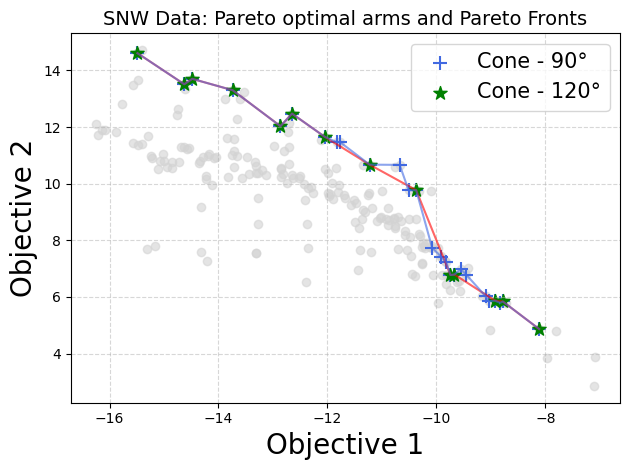

In [22]:
#plt.scatter(x, y,  marker='o', c=c)
plt.scatter(mu[:,0],mu[:,1],c='lightgray', alpha=0.6)
plt.scatter(pareto_pts_90[:,0],pareto_pts_90[:,1],c='royalblue', marker="+",s=100, label='Cone - 90°')

plt.scatter(pareto_pts_120[:,0],pareto_pts_120[:,1],c='green',marker="*",s=100, label='Cone - 120°')
sorted_120 = pareto_pts_120[pareto_pts_120[:, 0].argsort()]
plt.plot(sorted_120[:,0], sorted_120[:,1], color='red', linestyle='-', alpha=0.6)
sorted_90 = pareto_pts_90[pareto_pts_90[:, 0].argsort()]
plt.plot(sorted_90[:,0], sorted_90[:,1], color='royalblue', linestyle='-', alpha=0.6)
#plt.scatter(pareto_pts_int[:,0],pareto_pts_int[:,1],c='crimson', edgecolors='black', s=100, label='Both (45° & 90°)', zorder=5)
plt.title("SNW Data: Pareto optimal arms and Pareto Fronts", fontsize=14)
plt.xlabel("Objective 1",size=20)
plt.ylabel("Objective 2",size=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True,prop={'size': 15})
plt.tight_layout()

plt.savefig("pareto_snw.pdf",format="pdf")

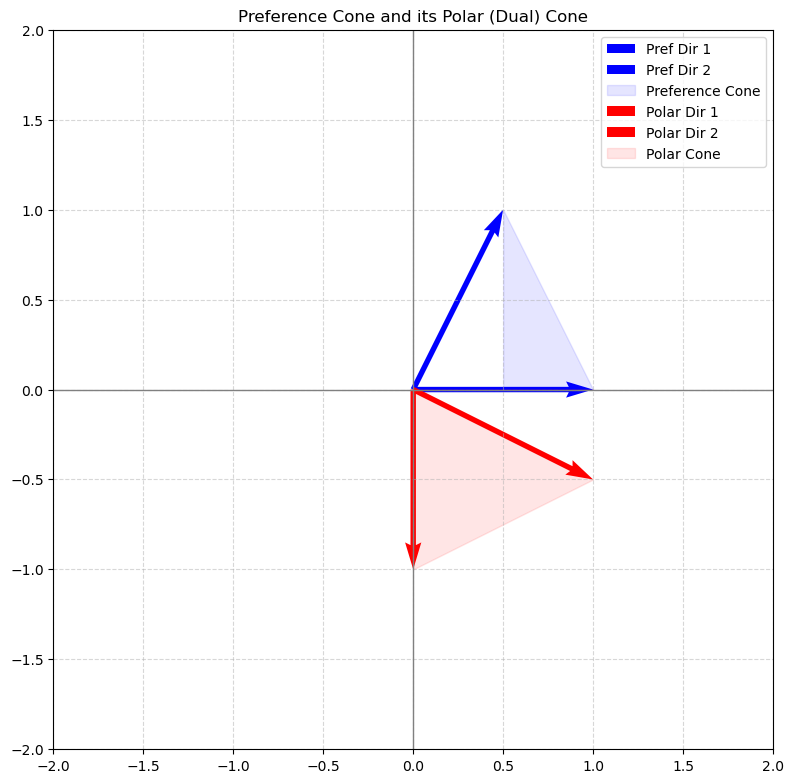

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(v, color, label=None):
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)

# Define preference cone vectors (in counterclockwise order)
v1 = np.array([1, 0])
v2 = np.array([0.5, 1])

# Function to compute polar cone (vectors that have non-positive inner product with all vectors in the original cone)
def compute_polar_cone(vecs):
    # Cross product based orthogonal directions
    orth1 = np.array([-vecs[0][1], vecs[0][0]])
    orth2 = np.array([-vecs[1][1], vecs[1][0]])
    return [-orth2, -orth1]

# Compute polar cone
polar_vecs = compute_polar_cone([v1, v2])

# Plotting setup
plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True, linestyle='--', alpha=0.5)

# Plot preference cone
plot_vector(v1, 'blue', 'Pref Dir 1')
plot_vector(v2, 'blue', 'Pref Dir 2')
plt.fill_between([0, v1[0], v2[0]], [0, v1[1], v2[1]], alpha=0.1, color='blue', label='Preference Cone')

# Plot polar cone
plot_vector(polar_vecs[0], 'red', 'Polar Dir 1')
plot_vector(polar_vecs[1], 'red', 'Polar Dir 2')
plt.fill_between([0, polar_vecs[0][0], polar_vecs[1][0]], [0, polar_vecs[0][1], polar_vecs[1][1]],
                 alpha=0.1, color='red', label='Polar Cone')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Preference Cone and its Polar (Dual) Cone")
plt.tight_layout()
plt.show()


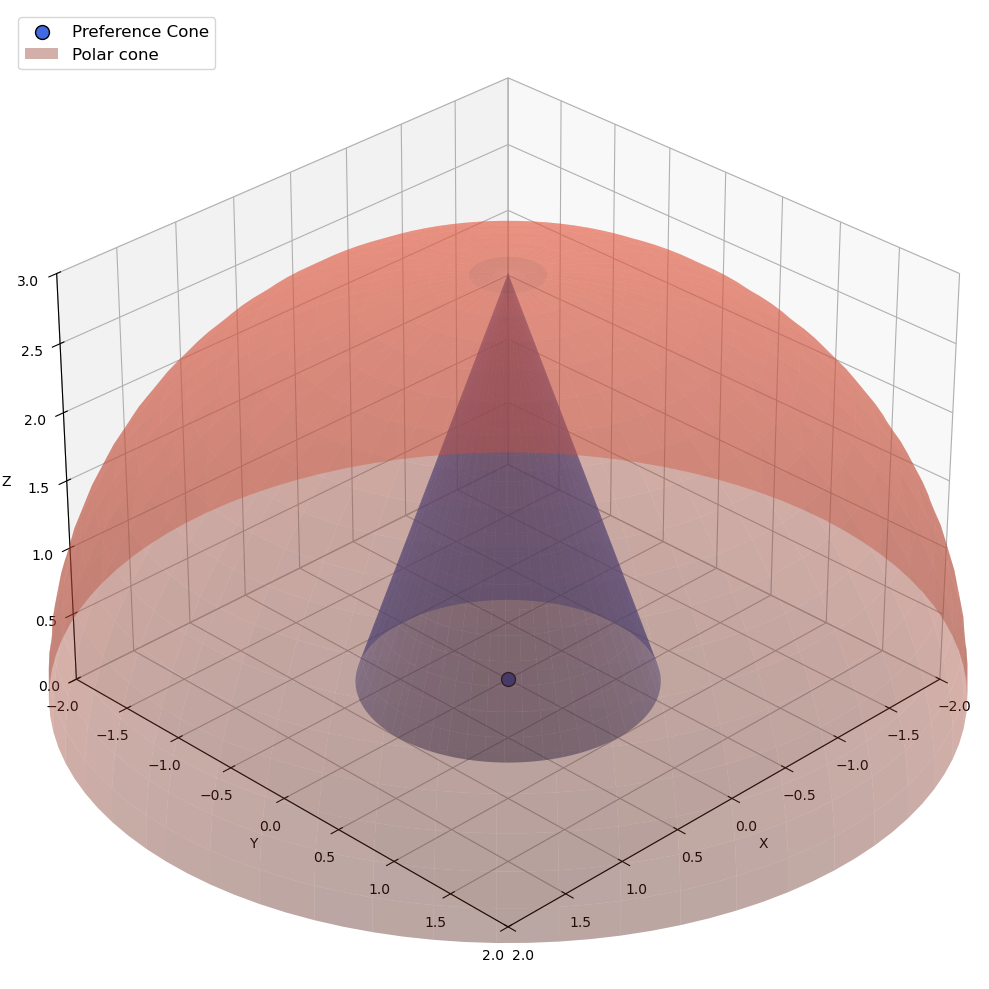

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot the 3D cone
def plot_cone(ax, base_radius, height, direction, color, alpha=0.5, label=None):
    # Generate a mesh grid for the cone
    theta = np.linspace(0, 2 * np.pi, 100)  # Angle for the base
    z = np.linspace(0, height, 20)  # Height of the cone
    theta, z = np.meshgrid(theta, z)

    # Calculate the radius of the base at each height level
    r = base_radius * (1 - z / height)  # Tapering effect
    
    # Parametrize the surface of the cone
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z_ = z

    # Apply the direction to the cone (scaling each coordinate by direction)
    x = x * direction[0]
    y = y * direction[1]
    z_ = z_ * direction[2]

    # Plot the surface
    ax.plot_surface(x, y, z_, color=color, alpha=alpha, linewidth=0)

    # Optionally plot the apex to show the direction
    ax.scatter([0], [0], [0], color=color, s=100, label=label, edgecolors='black')

# Define the preference cone direction (in this case, [1, 1, 1])
pref_direction = np.array([1, 1, 1])
base_radius = 1  # Base radius of the cone
height = 3  # Height of the cone

# Create the figure and 3D axis for plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the preference cone (blue)
plot_cone(ax, base_radius, height, pref_direction, color='royalblue', alpha=0.5, label='Preference Cone')

# --- Polar Cone ---
# The polar cone consists of vectors orthogonal to the preference direction.
# We will find the set of vectors orthogonal to [1, 1, 1] (i.e., satisfying dot product = 0)

# For simplicity, we'll define an orthogonal basis for the polar cone.
# Using numpy's `null_space` to find the orthogonal direction to [1, 1, 1]

# Creating orthogonal vectors in 3D. Since the preference cone's direction is [1, 1, 1],
# we need to find vectors that are perpendicular to this direction. We will generate a
# parametric surface of vectors orthogonal to the preference cone.

# Orthogonal direction: We know two vectors that are orthogonal to [1, 1, 1] in 3D space
# For simplicity, we use two arbitrary orthogonal vectors in this case.
v1 = np.array([1, -1, 0])
v2 = np.array([1, 0, -1])

# Parametrize the polar cone with these orthogonal vectors
phi = np.linspace(0, np.pi/2, 20)  # Angle for the polar cone
theta = np.linspace(0, 2 * np.pi, 100)  # Full circular symmetry

# Parametrize the surface of the polar cone
phi, theta = np.meshgrid(phi, theta)

# Using spherical coordinates to describe the polar cone
x_polar = height * np.sin(phi) * np.cos(theta)
y_polar = height * np.sin(phi) * np.sin(theta)
z_polar = height * np.cos(phi)

# Plot the polar cone
ax.plot_surface(x_polar, y_polar, z_polar, color='tomato', alpha=0.4, linewidth=0, label="Polar cone")

# --- Axes Settings ---
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([0, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_title('Preference Cone (Royal Blue) and Polar Cone (Tomato)')

# Add legend and finalize the plot
ax.legend(loc='upper left', fontsize=12)
ax.view_init(elev=30, azim=45)

# Show the plot
plt.tight_layout()
plt.show()


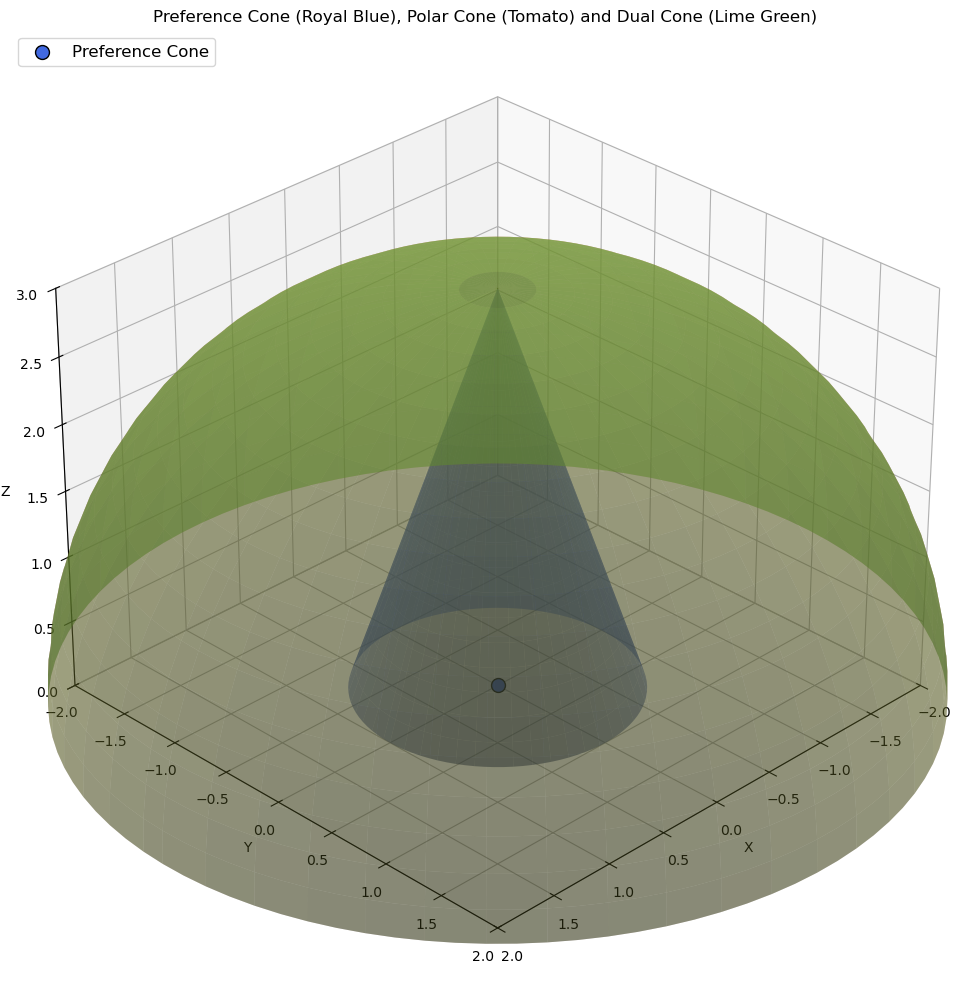

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot the 3D cone
def plot_cone(ax, base_radius, height, direction, color, alpha=0.5, label=None):
    # Generate a mesh grid for the cone
    theta = np.linspace(0, 2 * np.pi, 100)  # Angle for the base
    z = np.linspace(0, height, 20)  # Height of the cone
    theta, z = np.meshgrid(theta, z)

    # Calculate the radius of the base at each height level
    r = base_radius * (1 - z / height)  # Tapering effect
    
    # Parametrize the surface of the cone
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z_ = z

    # Apply the direction to the cone (scaling each coordinate by direction)
    x = x * direction[0]
    y = y * direction[1]
    z_ = z_ * direction[2]

    # Plot the surface
    ax.plot_surface(x, y, z_, color=color, alpha=alpha, linewidth=0)

    # Optionally plot the apex to show the direction
    ax.scatter([0], [0], [0], color=color, s=100, label=label, edgecolors='black')

# Define the preference cone direction (in this case, [1, 1, 1])
pref_direction = np.array([1, 1, 1])
base_radius = 1  # Base radius of the cone
height = 3  # Height of the cone

# Create the figure and 3D axis for plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the preference cone (blue)
plot_cone(ax, base_radius, height, pref_direction, color='royalblue', alpha=0.5, label='Preference Cone')

# --- Polar Cone ---
# The polar cone consists of vectors orthogonal to the preference direction.
# We will find the set of vectors orthogonal to [1, 1, 1] (i.e., satisfying dot product = 0)

# For simplicity, we'll define an orthogonal basis for the polar cone.
# Using numpy's `null_space` to find the orthogonal direction to [1, 1, 1]

# Creating orthogonal vectors in 3D. Since the preference cone's direction is [1, 1, 1],
# we need to find vectors that are perpendicular to this direction. We will generate a
# parametric surface of vectors orthogonal to the preference cone.

# Orthogonal direction: We know two vectors that are orthogonal to [1, 1, 1] in 3D space
# For simplicity, we use two arbitrary orthogonal vectors in this case.
v1 = np.array([1, -1, 0])
v2 = np.array([1, 0, -1])

# Parametrize the polar cone with these orthogonal vectors
phi = np.linspace(0, np.pi/2, 20)  # Angle for the polar cone
theta = np.linspace(0, 2 * np.pi, 100)  # Full circular symmetry

# Parametrize the surface of the polar cone
phi, theta = np.meshgrid(phi, theta)

# Using spherical coordinates to describe the polar cone
x_polar = height * np.sin(phi) * np.cos(theta)
y_polar = height * np.sin(phi) * np.sin(theta)
z_polar = height * np.cos(phi)

# Plot the polar cone
ax.plot_surface(x_polar, y_polar, z_polar, color='tomato', alpha=0.4, linewidth=0)

# --- Dual Cone ---
# The dual cone consists of vectors that make a non-negative inner product with vectors in the preference cone.
# For simplicity, we assume the dual cone is the cone whose vectors make a non-negative dot product with the preference direction.

# We will generate the dual cone by creating vectors that form a "positive" relationship with the preference cone's direction.
dual_phi = np.linspace(0, np.pi/2, 20)  # Half-angle for the dual cone
dual_theta = np.linspace(0, 2 * np.pi, 100)  # Full circular symmetry

# Parametrize the dual cone's surface
dual_phi, dual_theta = np.meshgrid(dual_phi, dual_theta)

# Parametrize the surface of the dual cone
x_dual = height * np.sin(dual_phi) * np.cos(dual_theta)
y_dual = height * np.sin(dual_phi) * np.sin(dual_theta)
z_dual = height * np.cos(dual_phi)

# Plot the dual cone (green)
ax.plot_surface(x_dual, y_dual, z_dual, color='limegreen', alpha=0.3, linewidth=0)

# --- Axes Settings ---
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([0, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Preference Cone (Royal Blue), Polar Cone (Tomato) and Dual Cone (Lime Green)')

# Add legend and finalize the plot
ax.legend(loc='upper left', fontsize=12)
ax.view_init(elev=30, azim=45)

# Show the plot
plt.tight_layout()
plt.show()


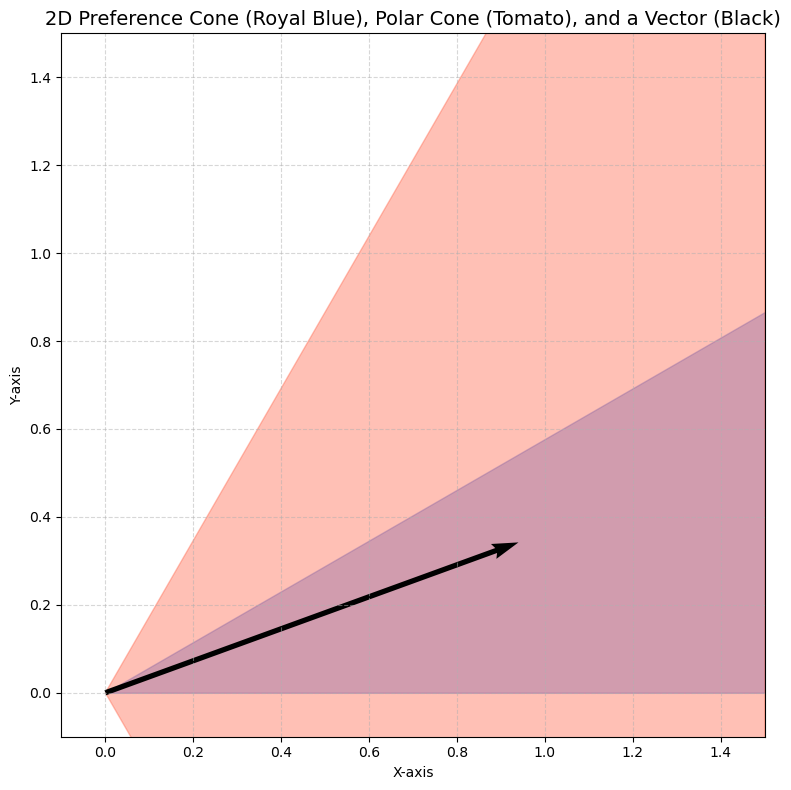

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Function to plot the preference cone
def plot_preference_cone(ax, angle, color, alpha=0.5):
    # Generate the cone: two lines making the angle
    x = np.linspace(0, 1.5, 100)
    y = np.tan(np.radians(angle)) * x
    ax.fill_between(x, 0, y, color=color, alpha=alpha)

# Function to plot the polar cone (vectors orthogonal to the preference direction)
def plot_polar_cone(ax, angle, color, alpha=0.5):
    # Generate the polar cone: vectors orthogonal to the preference direction
    # In 2D, we take a line at 90 degrees to the preference cone
    x = np.linspace(0, 1.5, 100)
    y_positive = np.tan(np.radians(90 - angle)) * x
    y_negative = -np.tan(np.radians(90 - angle)) * x
    ax.fill_between(x, y_positive, y_negative, color=color, alpha=alpha)

# Function to plot a vector inside the cone
def plot_vector(ax, angle, color):
    # Plot a vector inside the preference cone at some angle
    ax.quiver(0, 0, np.cos(np.radians(angle)), np.sin(np.radians(angle)),
              angles='xy', scale_units='xy', scale=1, color=color, linewidth=2)

# Plot the preference cone (e.g., with angle 30 degrees)
plot_preference_cone(ax, 30, color='royalblue', alpha=0.4)

# Plot the polar cone (e.g., with angle 60 degrees orthogonal to the preference cone)
plot_polar_cone(ax, 30, color='tomato', alpha=0.4)

# Plot a vector inside the preference cone (e.g., at 20 degrees)
plot_vector(ax, 20, color='black')

# Labels and other settings
ax.set_xlim([-0.1, 1.5])
ax.set_ylim([-0.1, 1.5])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Preference Cone (Royal Blue), Polar Cone (Tomato), and a Vector (Black)', fontsize=14)

# Set the same scale for both axes
ax.set_aspect('equal')

# Add grid for better visualization
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


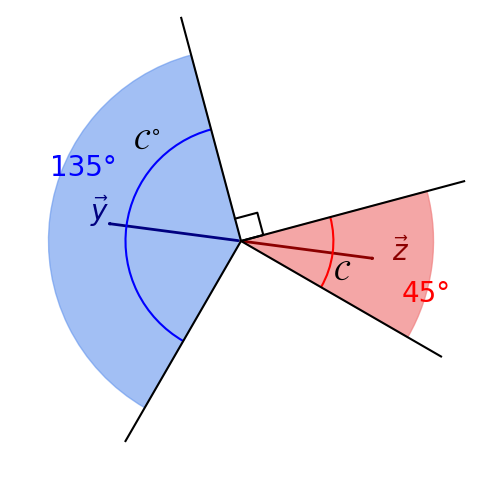

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge, FancyArrowPatch
from matplotlib import patches

# Set up the figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.axis('off')

# Origin
O = np.array([0, 0])

# Angles for cones
theta_c = 45  # preference cone angle
theta_polar = 135  # polar cone angle
rotation = -30  # rotation of the preference cone

# Cone directions in radians
theta1 = np.radians(rotation)
theta2 = np.radians(rotation + theta_c)
theta1_polar = np.radians(rotation + theta_c + 90)
theta2_polar = np.radians(rotation + theta_c + 90 + theta_polar)

# Draw preference cone
wedge_c = Wedge(center=O, r=2.5,
                theta1=np.degrees(theta1),
                theta2=np.degrees(theta2),
                color='lightcoral', alpha=0.7)
ax.add_patch(wedge_c)
ax.text(1.2, -0.5, r'$\mathcal{C}$', fontsize=20)

# Draw polar cone
wedge_polar = Wedge(center=O, r=2.5,
                    theta1=np.degrees(theta1_polar),
                    theta2=np.degrees(theta2_polar),
                    color='cornflowerblue', alpha=0.6)
ax.add_patch(wedge_polar)
ax.text(-1.4, 1.2, r'$\mathcal{C}^{\circ}$', fontsize=20)

# Draw bounding lines for cones
def draw_line(angle, color='k'):
    direction = np.array([np.cos(angle), np.sin(angle)])
    ax.plot([0, 3*direction[0]], [0, 3*direction[1]], color=color, lw=1.5)

draw_line(theta1)
draw_line(theta2)
draw_line(theta1_polar)
draw_line(theta2_polar)

# Add right angle markers
def draw_right_angle(origin, dir1, dir2, size=0.3):
    perp1 = origin + size * np.array([np.cos(dir1), np.sin(dir1)])
    perp2 = perp1 + size * np.array([np.cos(dir2), np.sin(dir2)])
    perp3 = origin + size * np.array([np.cos(dir2), np.sin(dir2)])
    ax.plot([origin[0], perp1[0], perp2[0], perp3[0]], 
            [origin[1], perp1[1], perp2[1], perp3[1]], color='k')

draw_right_angle(O, theta2, theta1_polar)

# Add vector in each cone
def draw_vector(angle, length=1.8, color='black', label=None):
    vec = length * np.array([np.cos(angle), np.sin(angle)])
    arrow = FancyArrowPatch((0, 0), vec, arrowstyle='->', color=color, lw=2)
    ax.add_patch(arrow)
    if label:
        ax.text(vec[0]*1.1, vec[1]*1.1, label, fontsize=20, color=color)

# One vector in preference cone
vec_angle_c = np.radians(rotation + theta_c/2)
draw_vector(vec_angle_c, color='darkred', label=r'$\vec{z}$')

# One vector in polar cone
vec_angle_polar = np.radians(rotation + theta_c + 90 + theta_polar/2)
draw_vector(vec_angle_polar, color='navy', label=r'$\vec{y}$')

# Angle arcs
def draw_angle_arc(start_angle, angle, radius, color, label, label_offset=0.3, away_from_vector=True):
    arc = patches.Arc(O, 2*radius, 2*radius, angle=0,
                      theta1=np.degrees(start_angle),
                      theta2=np.degrees(start_angle + angle),
                      color=color, lw=1.5)
    ax.add_patch(arc)
    
    label_angle = start_angle + angle/2

    # Adjust label position to avoid overlap
    offset_x = label_offset * np.cos(label_angle)
    offset_y = label_offset * np.sin(label_angle)

    if away_from_vector:
        offset_x += 0.6 * np.sign(offset_x)
        offset_y += 0.6 * np.sign(offset_y)

    label_pos = radius * np.array([np.cos(label_angle), np.sin(label_angle)]) + np.array([offset_x, offset_y])
    ax.text(label_pos[0], label_pos[1], label, fontsize=20, color=color)


draw_angle_arc(theta1, theta2 - theta1, 1.2, 'red', f"{theta_c}°")
draw_angle_arc(theta1_polar, theta2_polar - theta1_polar, 1.5, 'blue', f"{theta_polar}°", label_offset=0.4)


# Final plot adjustments
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
#plt.title("Preference Cone $C$ and Polar Cone $C^\\circ$", fontsize=14)
plt.savefig("polar_cone.pdf", format="pdf")
plt.show()
